Standardization ............................. Z-Score , standaradscaler

# convert data in such a way that we will get mean=0 and SD=1

In [1]:
import pandas as pd

In [21]:
import seaborn as sns

In [5]:
df = pd.read_csv('covid_toy.csv')

In [6]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [8]:
df1 = df[['age','gender','fever']]

In [9]:
df1

,age,gender,fever
0,60,Male,103.0
1,27,Male,100.0
2,42,Male,101.0
3,31,Female,98.0
4,65,Female,101.0
...,...,...,...
95,12,Female,104.0
96,51,Female,101.0
97,20,Female,101.0
98,5,Female,98.0


In [10]:
df1.isnull().sum()

age        0
gender     0
fever     10
dtype: int64

In [11]:
df1['fever']

0     103.0
1     100.0
2     101.0
3      98.0
4     101.0
      ...  
95    104.0
96    101.0
97    101.0
98     98.0
99     98.0
Name: fever, Length: 100, dtype: float64

In [12]:
df1['fever'].mean()

100.84444444444445

In [13]:
df1['fever'] = df1['fever'].fillna(df1['fever'].mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_1724\3218473801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fever'] = df1['fever'].fillna(df1['fever'].mean())


In [14]:
df1

,age,gender,fever
0,60,Male,103.0
1,27,Male,100.0
2,42,Male,101.0
3,31,Female,98.0
4,65,Female,101.0
...,...,...,...
95,12,Female,104.0
96,51,Female,101.0
97,20,Female,101.0
98,5,Female,98.0


In [15]:
df1.isnull().sum()

age       0
gender    0
fever     0
dtype: int64

In [16]:
df1['gender'] = df['gender'].map({'Male':1 , 'Female':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_1724\2146364287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'] = df['gender'].map({'Male':1 , 'Female':0})


In [17]:
df1

,age,gender,fever
0,60,1,103.0
1,27,1,100.0
2,42,1,101.0
3,31,0,98.0
4,65,0,101.0
...,...,...,...
95,12,0,104.0
96,51,0,101.0
97,20,0,101.0
98,5,0,98.0


In [19]:
df1['gender'].value_counts()

0    59
1    41
Name: gender, dtype: int64

<AxesSubplot:ylabel='Density'>

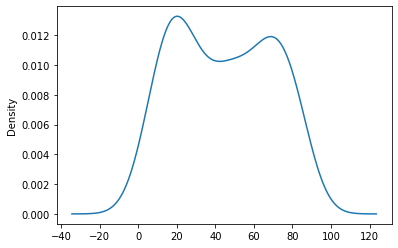

In [22]:
df1['age'].plot(kind='kde')

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [26]:
a = sc.fit_transform(df1)

In [27]:
a

array([[ 0.63746697,  1.19959343,  1.11190579],
       [-0.69563886,  1.19959343, -0.43559196],
       [-0.08968166,  1.19959343,  0.08024062],
       [-0.53405027, -0.83361577, -1.46725713],
       [ 0.8394527 , -0.83361577,  0.08024062],
       [ 1.60699847, -0.83361577,  0.        ],
       [-1.22080176,  1.19959343,  0.08024062],
       [-0.97841888, -0.83361577,  0.        ],
       [-1.01881603, -0.83361577, -0.43559196],
       [ 0.79905555, -0.83361577,  0.08024062],
       [ 1.24342416, -0.83361577,  0.        ],
       [ 0.8394527 , -0.83361577, -1.46725713],
       [-0.77643315, -0.83361577, -0.95142454],
       [ 0.79905555,  1.19959343,  0.59607321],
       [ 0.27389265,  1.19959343,  1.62773838],
       [ 1.04143843,  1.19959343,  1.11190579],
       [ 1.00104128, -0.83361577,  1.11190579],
       [-0.17047596, -0.83361577, -1.46725713],
       [ 0.79905555, -0.83361577, -1.46725713],
       [-0.08968166, -0.83361577,  0.        ],
       [-1.30159605,  1.19959343, -1.467

In [30]:
df1[['age','gender','fever']] = a

C:\Users\HP\AppData\Local\Temp\ipykernel_1724\2935815600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['age','gender','fever']] = a


In [31]:
df1

,age,gender,fever
0,0.637467,1.199593,1.111906
1,-0.695639,1.199593,-0.435592
2,-0.089682,1.199593,0.080241
3,-0.534050,-0.833616,-1.467257
4,0.839453,-0.833616,0.080241
...,...,...,...
95,-1.301596,-0.833616,1.627738
96,0.273893,-0.833616,0.080241
97,-0.978419,-0.833616,0.080241
98,-1.584376,-0.833616,-1.467257


In [32]:
df1.describe()

,age,gender,fever
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.108624e-17,9.992007e-17,-1.905143e-15
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.584376e+00,-8.336158e-01,-1.467257e+00
25%,-9.784189e-01,-8.336158e-01,-9.514245e-01
50%,3.150977e-02,-8.336158e-01,4.012031e-02
75%,9.000484e-01,1.199593e+00,5.960732e-01
max,1.606998e+00,1.199593e+00,1.627738e+00


In [33]:
df1.describe().round()

,age,gender,fever
count,100.0,100.0,100.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0
50%,0.0,-1.0,0.0
75%,1.0,1.0,1.0
max,2.0,1.0,2.0
